In [2]:
# 导入所需库

import numpy as np
import sklearn
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

## 1. 回归任务评价指标

### 1.1 MSE

- 计算公式：$MSE = \frac{1}{N}\sum_{i = 1}^N(y_i -\hat{y_i})^2$，其中 `N` 是样本数量

- 时间复杂度：$O(N)$

- 分布假设：MSE假设误差的分布满足基本正态分布，即 $\mu = 0$， $\sigma^2 = 1$

    - 给定 $x_i$，输出值为 $y_i$ 的概率为： 
        
        $$
        p(y_i | x_i) = \frac{1}{2\pi} exp(-\frac{(y_i - \hat{y_i})^2}{2})
        $$

    - 根据独立同分布的假设，整体的似然函数为：
      
      $$
      L(x, y) = \prod_{i = 1}^{N}(\frac{1}{\sqrt{2\pi}} exp(-\frac{(y_i - \hat{y_i})^2}{2}))
      $$

    - 取对数，并最大化似然函数：
        
        $$
        LL(x, y) = log(L(x, y)) = \frac{N}{2}log(2\pi) - \frac{1}{2}\sum_{i = 1}^{N}(y_i - \hat{y_i})^2
        $$
    
    - 排除掉无关变量后，可以发现最小化 `MSE`  与 最大化似然函数是一致的

- 正态分布检验：使用scipy库中的统计检验函数，如scipy.stats.shapiro()、scipy.stats.kstest()、scipy.stats.anderson()来进行正态性检验。

    - 检验统计量 (Test Statistic)：衡量样本数据与正态分布的偏离程度，范围通常在0到1之间，值越接近1，数据越符合正态分布。
    
    - p 值 (p-value)：p值用于检验样本数据是否来自正态分布的概率。如果 p 值较小(小于0.05)，说明样本数据偏离正态分布的程度较大。

- 中心极限定理（Central Limit Theorem, CLT）：

  - 设 $X_1, X_2, \ldots, X_n$ 是 $ n $  个独立同分布的随机变量，每个随机变量的均值为 $ \mu $ 和方差为 $ \sigma^2 $。

  - 定义样本均值 $ \bar{X}_n $为：
    $$
    \bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i
    $$

  - 中心极限定理指出，当样本量 $$ n $$ 足够大时，样本均值 $$ \bar{X}_n $$ 的分布将趋近于正态分布，即：
    $$
    \bar{X}_n \sim N \left( \mu, \frac{\sigma^2}{n} \right)
    $$

  - 这意味着，无论原始数据的分布是什么，只要样本量足够大，样本均值的分布就会近似为正态分布。
  
- 大数定律（Law of Large Numbers, LLN）：

  - **弱大数定律**：
    - 设 $X_1, X_2, \ldots, X_n$ 是 $n$ 个独立同分布的随机变量，每个随机变量的均值为 $ \mu $ 和方差为 $ \sigma^2 $。
    
    - 定义样本均值 $\bar{X}_n$ 为：
      $$
      \bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i
      $$
    
    - 弱大数定律指出，样本均值 $ \bar{X}_n $ 会几乎肯定地趋近于总体均值 $ \mu $：
      $$
      \bar{X}_n \xrightarrow{P} \mu
      $$
    
    - 也就是说，对于任意的小的正数 $ \epsilon $，样本均值与总体均值的差距趋近于零的概率趋近于1。

  - **强大数定律**：
    
    - 强大数定律是弱大数定律的一个更强版本，描述了样本均值几乎确定地收敛于总体均值：
      $$
      \bar{X}_n \xrightarrow{a.s.} \mu
      $$
    
    - 这里的“几乎确定地”意味着样本均值与总体均值的差异在无限样本中几乎一定会消失。

- 大数定律 和 中心极限定理的关系：
  
  - **中心极限定理**：关注的是样本均值的分布形状，当样本量足够大时，样本均值会近似于正态分布。这是一个关于分布形状的定理。
    
  - **大数定律**：关注的是样本均值的收敛性质，当样本量增大时，样本均值趋近于总体均值。这是一个关于收敛性的定理。

  两者的关系是，大数定律确保了样本均值收敛到总体均值，而中心极限定理则确保了在大样本情况下，样本均值的分布趋近于正态分布。中心极限定理通常需要样本量足够大来使得样本均值近似正态分布，而大数定律则关注样本均值的收敛性，不直接依赖于样本量的分布形状。

- 为什么用MSE评估模型预测结果是有效的？

  - 稳定性：大数定律确保了随着样本量的增加，样本均方误差会趋近于总体均方误差。即使模型的误差在小样本情况下可能会有波动，随着样本量的增加，MSE 会变得更稳定和可靠。

  - 分布性质：中心极限定理保证了在大样本情况下，MSE 的分布接近正态分布，这使得我们可以应用统计推断技术来评估模型的性能，并进行假设检验。

  - 评估准确性：当样本量足够大时，MSE 可以提供对模型预测误差的准确估计，因为它不仅在数值上接近真实的误差均值，而且其分布特性也符合正态分布，使得评估更加稳健。

In [3]:
# MSE 
def my_mse(y_pred, y_true):
    
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)

    return np.mean((y_pred - y_true) ** 2)

y_pred = np.random.rand(10) # rand 函数会生成[0, 1]之间的随机数
y_true = np.random.rand(10)
print(my_mse(y_pred, y_true))
print(sklearn.metrics.mean_squared_error(y_pred, y_true))

0.21114586290567455


AttributeError: module 'sklearn' has no attribute 'metrics'

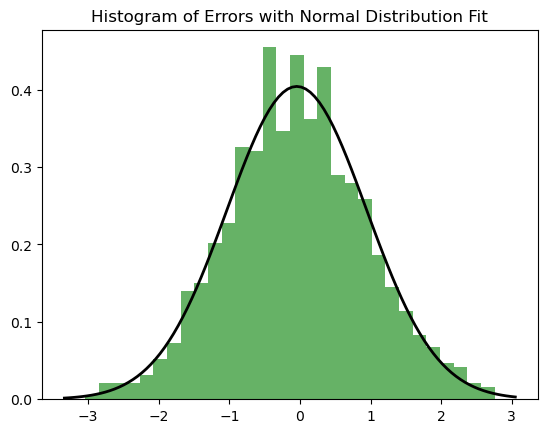

Shapiro-Wilk Test Statistic: 0.9985560774803162, p-value: 0.5916484594345093


In [4]:
# 误差正态性检验

# 生成随机误差数据
np.random.seed(0)
errors = np.random.normal(loc=0, scale=1, size=1000)

# 绘制直方图
plt.hist(errors, bins=30, density=True, alpha=0.6, color='g')

# 绘制正态分布的理论密度函数
mu, std = stats.norm.fit(errors)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of Errors with Normal Distribution Fit')
plt.show()

# 进行Shapiro-Wilk检验
stat, p_value = stats.shapiro(errors)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')
